# Titanic Dataset :EDA

## Introduction:


### Dataset Statistics:

Number Of Passengers=  887<br>
Passengers Survived=  342<br>
% of females survived=   74.20<br>
% of males survived=     19.02

### Data Fields Explanation

The titanic dataset consist of record of 887 passengers in a single CSV file.The columns in the file are:

    Survived                   : 0 or 1 (1 for survived and 0 for not survived)
    Pclass                     :Ticket Class (1=1st,2=2nd,3=3rd)
    Name                       :Name of the Passenger
    Sex                        :Gender of Passenger
    Age                        :Age of Passenger
    Siblings/Spouses Abroad    :No of siblings/spouses abroad the Titanic
    Parents/Children Abroad    :No of parents/childrens abroad the Titanic
    Fare                       :Cost of the ticket

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
print(df.shape)

(887, 8)


In [4]:
print(df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [5]:
print(df.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [6]:
print(df.describe())

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max              

In [12]:
df.isnull().sum()

# No missing values in any of the column

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

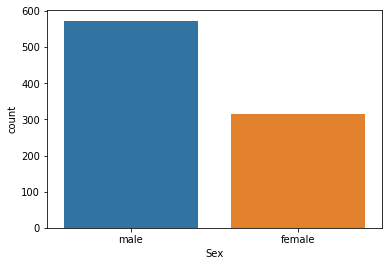

In [7]:
sns.countplot(x='Sex',data=df)

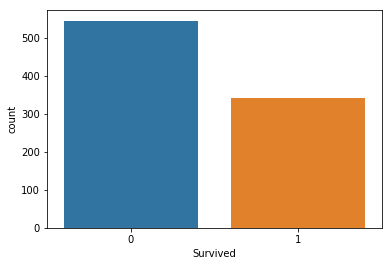

In [8]:
sns.countplot(x='Survived',data=df)

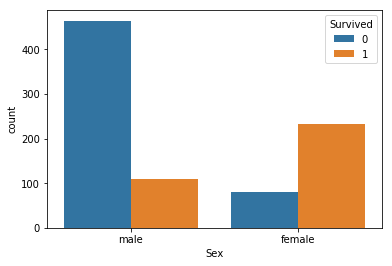

In [9]:
sns.countplot(x='Sex',hue='Survived',data=df)

### Observation :Women are more likely to survive than men

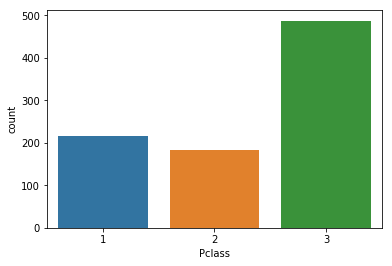

In [10]:
sns.countplot(x='Pclass',data=df)

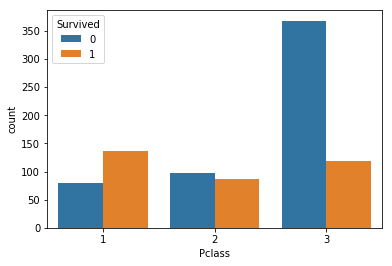

In [11]:
sns.countplot(x='Pclass',hue='Survived',data=df)

In [13]:
df['Pclass'].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
pd.crosstab(df['Pclass'],df['Sex'],margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,343,487
All,314,573,887


In [18]:
pd.crosstab(df['Sex'],df['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,464,109,573
All,545,342,887


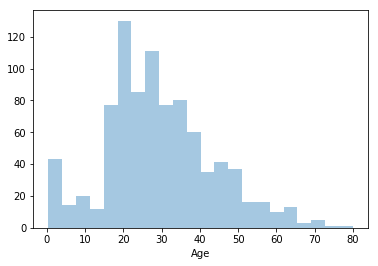

In [20]:
sns.distplot(df['Age'],kde=False)

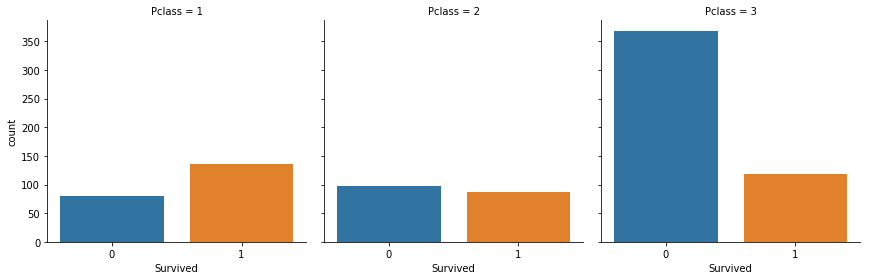

In [22]:
sns.factorplot(x='Survived',col='Pclass',kind='count',data=df)

### Observation:Passengers that travelled in first class were more likely to survive. On the other hand, passengers travelling in third class were more unlikely to survive.

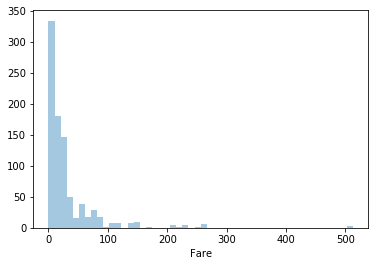

In [23]:
sns.distplot(df['Fare'],kde=False)

### Observation:Most passengers paid less than 100 to travel on Titanic

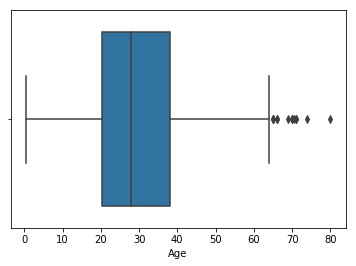

In [24]:
sns.boxplot(df['Age'])

### CONCLUSION:
Passengers travelling in higher class have most chances of survival.<br>
Females have more chances pof survival than males.<br>
Most of the passengers have paid < 100 to travel on titanic 



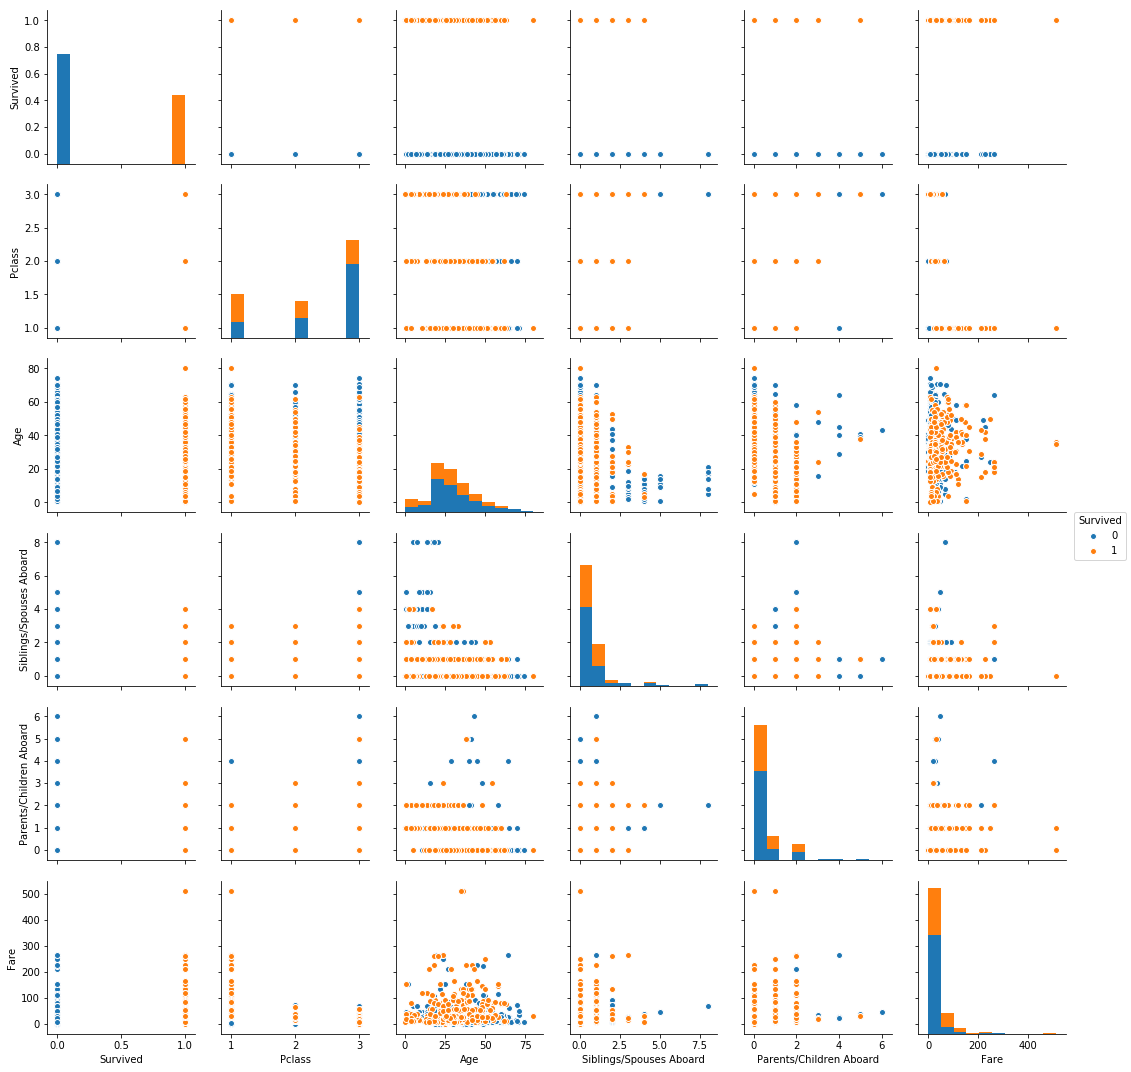

In [32]:
sns.pairplot(data=df,hue='Survived')

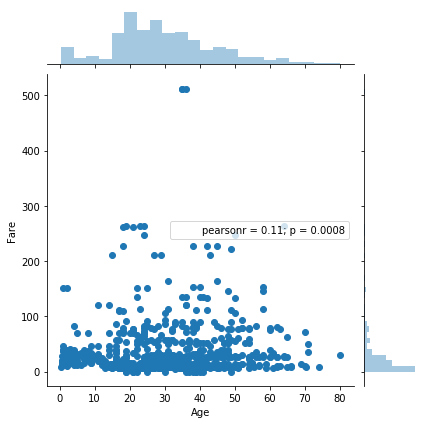

In [27]:
sns.jointplot(x='Age',y='Fare',data=df)

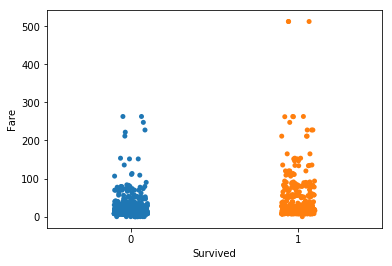

In [30]:
sns.stripplot(x='Survived', y='Fare', data=df,jitter=True)

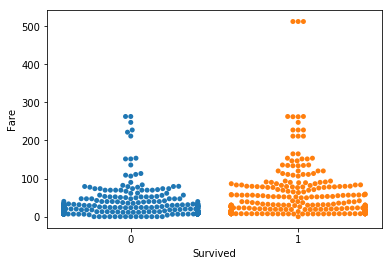

In [31]:
sns.swarmplot(x='Survived', y='Fare', data=df);

### Observations: We can clearly see that 2-3 passengers paid too much i.e they took a 1st class ticket where the probabilty of survival is much higher and still they died so we consider them as outliers 

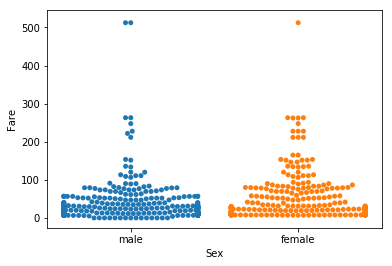

In [39]:
sns.swarmplot(x='Sex', y='Fare', data=df);

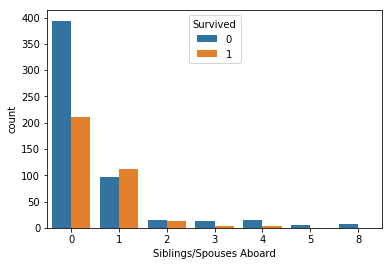

In [49]:
sns.countplot(df['Siblings/Spouses Aboard'],hue=df['Survived'])

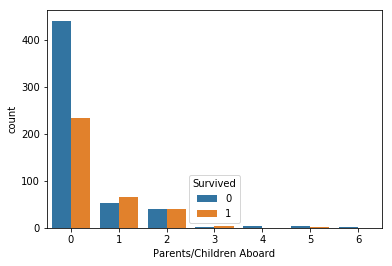

In [51]:
sns.countplot(df['Parents/Children Aboard'],hue=df['Survived'])

In [33]:
num_features=list(set(df.columns)-set(['Name','Sex']))

In [34]:
cor_mat = df[num_features].corr()


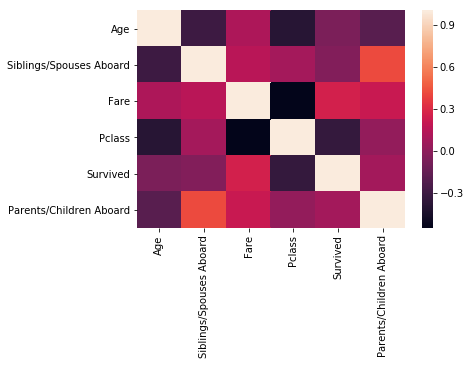

In [36]:
sns.heatmap(cor_mat)

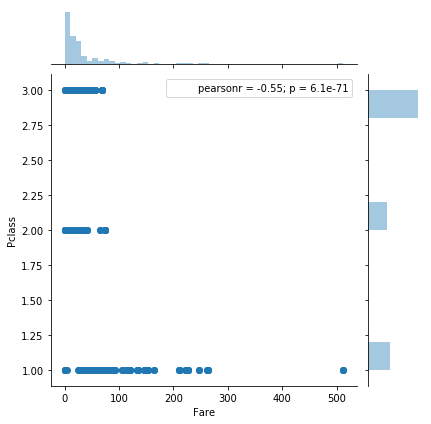

In [37]:
sns.jointplot(x='Fare',y='Pclass',data=df)

### The three graphs which are most useful : 

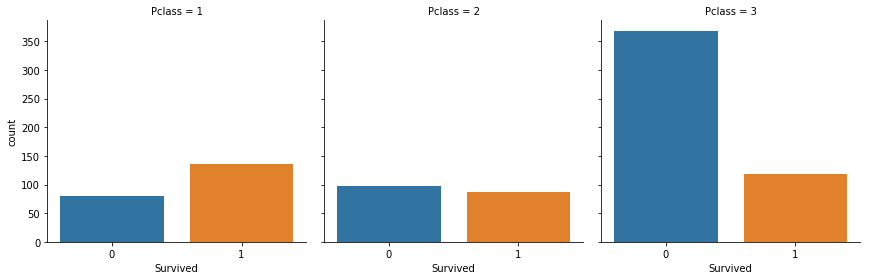

In [40]:
sns.factorplot(x='Survived',col='Pclass',kind='count',data=df)

It clearly shows that passengers who survived mostly belong to 1st and 2nd class while 3rd class passengers mostly died i.e we can say that during the rescue mission priority must have been given to rich people over poor people. 

In [41]:
pd.crosstab(df['Survived'],df['Sex'],margins=True)

Sex,female,male,All
Survived,,,
0,81,464,545
1,233,109,342
All,314,573,887


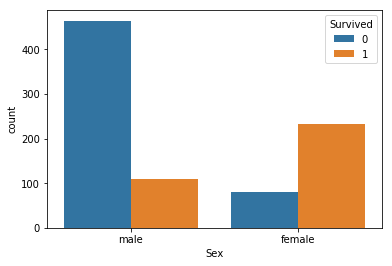

In [42]:
sns.countplot(x='Sex',data=df,hue="Survived")

We can easily see that women are more likely to survive than men
74.20% of women survived while just 19.20% of men survuved.


In [1]:
sns.countplot(df['Siblings/Spouses Aboard'],hue=df['Srvived'])


NameError: name 'sns' is not defined

In [2]:
sns.countplot(df['Parents/Children Aboard'],hue=df['Srvived'])

NameError: name 'sns' is not defined

We can conclude that passengers who don't have their family on the ship are more likely to die while passengers having family are more likely to survive.